# Introduction

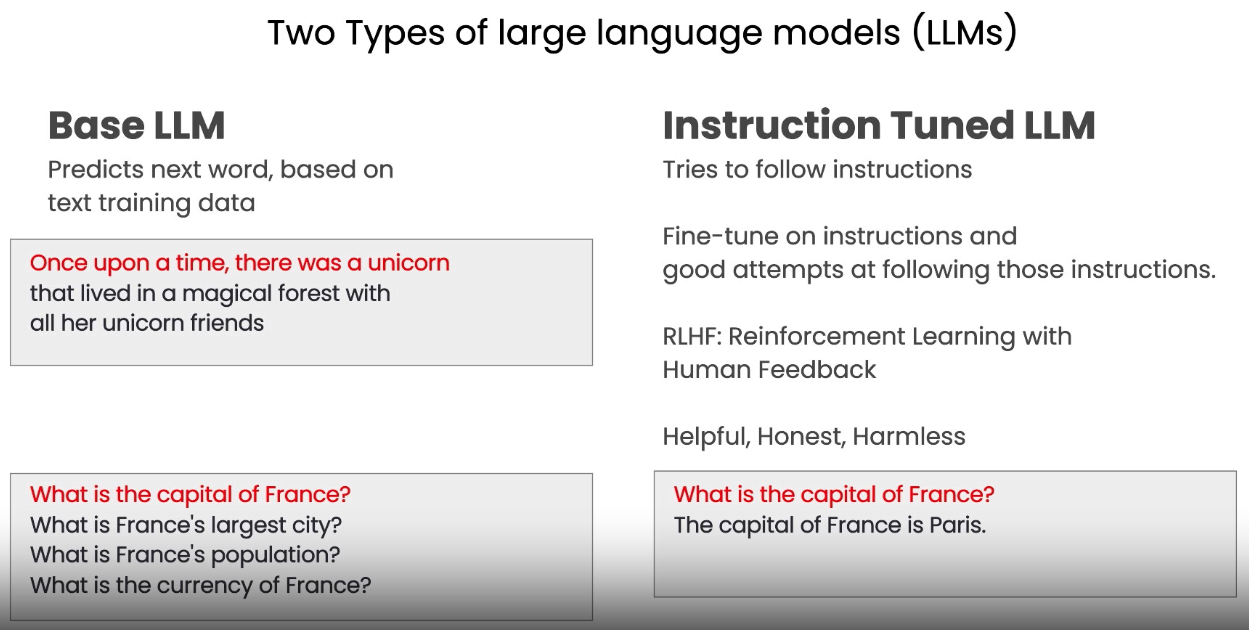

# Guidelines

# Guidelines for Prompting
In this lesson, you'll practice two prompting principles and their related tactics in order to write effective prompts for large language models.

## Setup
#### Load the API key and relevant Python libaries.

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

#### helper function

This helper function will make it easier to use prompts and look at the generated outputs:

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Tactics

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [3]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

To guide a model towards the desired output and reduce irrelevant or incorrect responses, it is important to provide clear and specific instructions, which can be achieved through longer prompts that offer more clarity and context.


#### Tactic 2: Ask for a structured output
- JSON, HTML

In [4]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

{
  "books": [
    {
      "book_id": 1,
      "title": "The Enigma of Elysium",
      "author": "Evelyn Sinclair",
      "genre": "Mystery"
    },
    {
      "book_id": 2,
      "title": "Whispers in the Wind",
      "author": "Nathaniel Blackwood",
      "genre": "Fantasy"
    },
    {
      "book_id": 3,
      "title": "Echoes of the Past",
      "author": "Amelia Hart",
      "genre": "Romance"
    }
  ]
}


#### Tactic 3: Ask the model to check whether conditions are satisfied


In [6]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Get some water boiling.
Step 2 - Grab a cup and put a tea bag in it.
Step 3 - Once the water is hot enough, pour it over the tea bag.
Step 4 - Let it sit for a bit so the tea can steep.
Step 5 - After a few minutes, take out the tea bag.
Step 6 - If you like, add some sugar or milk to taste.
Step 7 - Enjoy your delicious cup of tea.


In [7]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
No steps provided.


#### Tactic 4: "Few-shot" prompting

In [8]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

<grandparent>: Resilience is like a mighty oak tree that withstands the strongest storms, bending but never breaking. It is the ability to bounce back from adversity, to find strength in the face of challenges, and to persevere even when the odds seem insurmountable. Just as a diamond is formed under immense pressure, resilience is forged through the trials and tribulations of life.


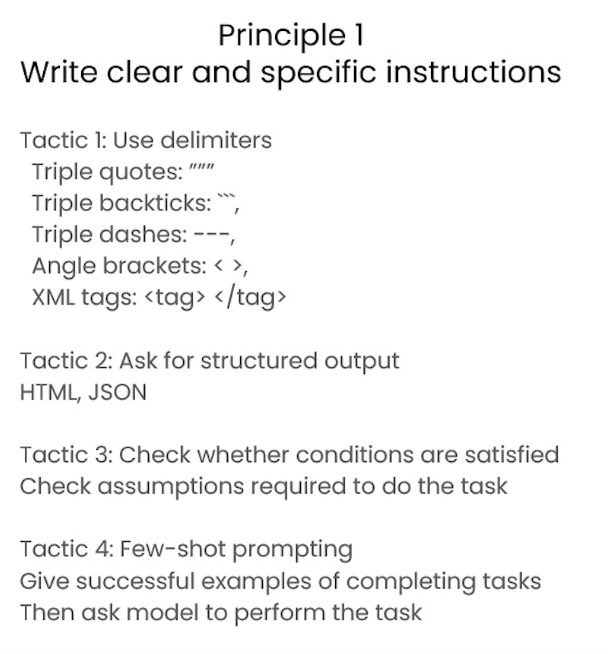

### Principle 2: Give the model time to “think” 

#### Tactic 1: Specify the steps required to complete a task

In [9]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
1 - Jack and Jill, siblings, go on a quest to fetch water from a hilltop well, but encounter misfortune when Jack trips on a stone and tumbles down the hill, with Jill following suit, yet they return home and remain undeterred in their adventurous spirits.

2 - Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline, mais rencontrent un malheur lorsque Jack trébuche sur une pierre et dévale la colline, suivi de Jill, pourtant ils rentrent chez eux et restent déterminés dans leur esprit d'aventure.

3 - Jack, Jill

4 - {
  "french_summary": "Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline, mais rencontrent un malheur lorsque Jack trébuche sur une pierre et dévale la colline, suivi de Jill, pourtant ils rentrent chez eux et restent déterminés dans leur esprit d'aventure.",
  "num_names": 2
}


#### Ask for output in a specified format

In [10]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>s
Translation: <summary translation>
Names: <list of names in Italian summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: Jack and Jill, siblings from a charming village, go on a quest to fetch water from a hilltop well, but misfortune strikes when Jack trips on a stone and tumbles down the hill, with Jill following suit, yet they return home and continue exploring with delight.

Translation: Jack et Jill, frère et sœur d'un charmant village, partent à la recherche d'eau d'un puits au sommet d'une colline, mais le malheur frappe lorsque Jack trébuche sur une pierre et dévale la colline, suivi de Jill, pourtant ils rentrent chez eux et continuent à explorer avec joie.

Names: Jack, Jill

Output JSON: 
{
  "french_summary": "Jack et Jill, frère et sœur d'un charmant village, partent à la recherche d'eau d'un puits au sommet d'une colline, mais le malheur frappe lorsque Jack trébuche sur une pierre et dévale la colline, suivi de Jill, pourtant ils rentrent chez eux et continuent à explorer avec joie.",
  "num_names": 2
}


#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [11]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The student's solution is correct. They correctly identified the costs for land, solar panels, and maintenance, and calculated the total cost as a function of the number of square feet.


#### Note that the student's solution is actually not correct.
#### We can fix this by instructing the model to work out its own solution first.

In [12]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

To calculate the total cost for the first year of operations, we need to add up the costs of land, solar panels, and maintenance.

Let x be the size of the installation in square feet.

Costs:
1. Land cost: $100 * x
2. Solar panel cost: $250 * x
3. Maintenance cost: $100,000 + $10 * x

Total cost: $100 * x + $250 * x + $100,000 + $10 * x = $360 * x + $100,000

Is the student's solution the same as the actual solution just calculated:
No

Student grade:
Incorrect


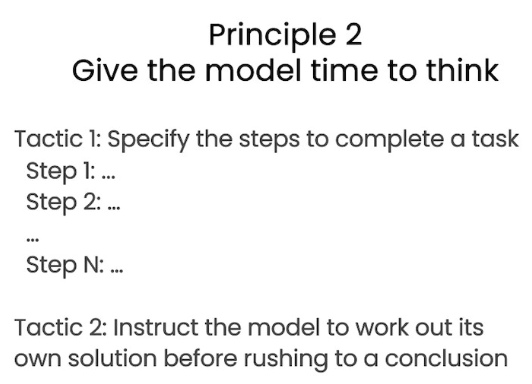

## Model Limitations: Hallucinations
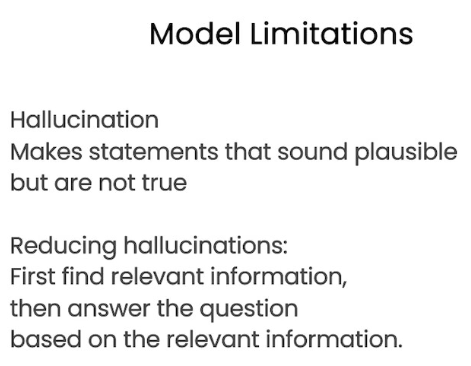
- Boie is a real company, the product name is not real.

In [13]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a technologically advanced toothbrush designed to provide a superior brushing experience. Boie is a company known for its innovative oral care products, and the AeroGlide UltraSlim Smart Toothbrush is no exception.

One of the standout features of this toothbrush is its ultra-slim design. The brush head is only 2mm thick, making it much thinner than traditional toothbrushes. This slim profile allows for better access to hard-to-reach areas of the mouth, ensuring a thorough and effective clean.

The AeroGlide UltraSlim Smart Toothbrush also incorporates smart technology. It connects to a mobile app via Bluetooth, allowing users to track their brushing habits and receive personalized recommendations for improving their oral hygiene routine. The app provides real-time feedback on brushing technique, ensuring that users are brushing for the recommended two minutes and covering all areas of their mouth.

The toothbrush itself is made from 